<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Frens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
A classroom consists of N students, whose friendships can be represented in an adjacency list. For example, the following descibes a situation where 0 is friends with 1 and 2, 3 is friends with 6, and so on.
```
{0: [1, 2],
 1: [0, 5],
 2: [0],
 3: [6],
 4: [],
 5: [1],
 6: [3]}
```
Each student can be placed in a friend group, which can be defined as the transitive closure of that student's friendship relations. In other words, this is the smallest set such that no student in the group has any friends outside this group. For the example above, the friend groups would be {0, 1, 2, 5}, {3, 6}, {4}.

Given a friendship list such as the one above, determine the number of friend groups in the class.

##Solution:
The problem you're describing can be modeled as finding the number of connected components in an undirected graph. Each student represents a node in the graph, and each friendship is an undirected edge between two nodes. Friend groups are then connected components in this graph - groups of nodes that are connected to each other, but not to any nodes outside the group.

To find the number of connected components, you can perform a graph traversal algorithm such as Depth-First Search (DFS) or Breadth-First Search (BFS) starting from each node that has not already been visited. Each time you start a new search from an unvisited node, you're finding a new friend group.




##Implementation:
In the provided code below, the `count_friend_groups` function iterates over each student and uses a recursive `dfs` function to visit all students in the current student's friend group. The number of times a new DFS is initiated corresponds to the number of friend groups.

There are 3 friend groups in the class.
Group 1: {0, 1, 2, 5}
Group 2: {3, 6}
Group 3: {4}


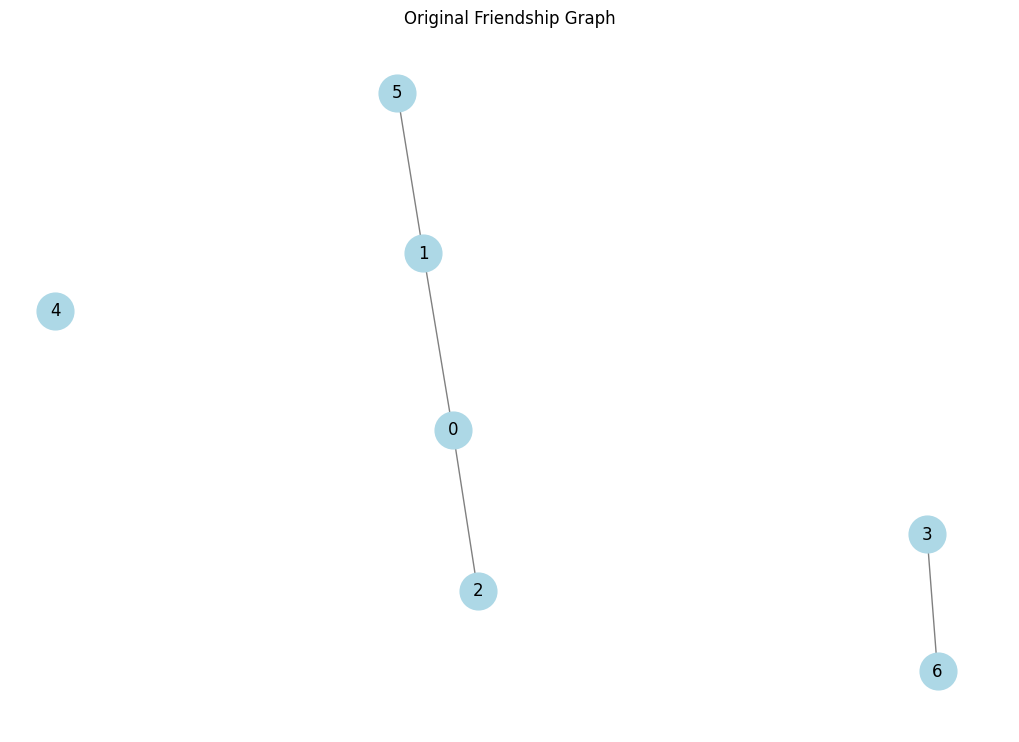

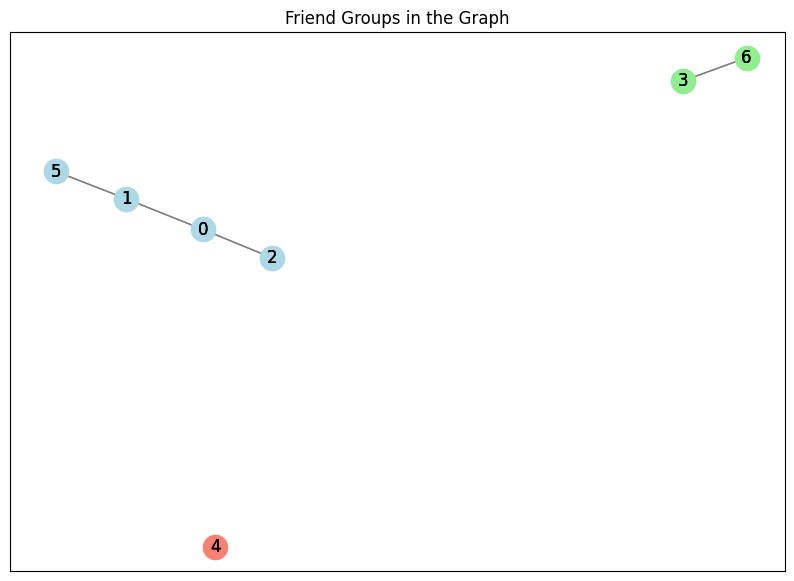

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# The friendship list provided
friendships = {
    0: [1, 2],
    1: [0, 5],
    2: [0],
    3: [6],
    4: [],
    5: [1],
    6: [3]
}

# Initialize a graph object
G = nx.Graph()

# Add nodes to the graph object, to ensure isolated nodes are included
G.add_nodes_from(friendships)

# Add edges to the graph object
for student, friends in friendships.items():
    for friend in friends:
        G.add_edge(student, friend)

# Find the connected components (friend groups)
connected_components = list(nx.connected_components(G))

# Determine the number of friend groups and print them
num_groups = len(connected_components)
print(f"There are {num_groups} friend groups in the class.")
for i, group in enumerate(connected_components, start=1):
    print(f"Group {i}: {group}")

# Draw the original friendship graph
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700)
plt.title("Original Friendship Graph")
plt.show()

# Draw the friend groups with different colors
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)  # positions for all nodes

# Draw isolated nodes as well
nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color='lightgrey')

# For each connected component (friend group)
colors = ['lightblue', 'lightgreen', 'salmon', 'gold', 'violet']  # Color list for friend groups
for count, nodes in enumerate(connected_components):
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors[count % len(colors)])
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u in nodes for v in nodes if u != v and G.has_edge(u, v)], edge_color='gray')
    nx.draw_networkx_labels(G, pos)

plt.title("Friend Groups in the Graph")
plt.show()
